In [8]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_dir='train'   #This is the directory where I store the images in the training set. 
#You don't need to change it if you don't remove it out of the current directory.

val_dir='val'        #This is the directory where I store the images in the training set.
#You don't need to change it if you don't remove it out of the current directory.


train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=256,
    class_mode="binary",
    shuffle=True,  
    seed=42
)

valid_generator = datagen.flow_from_directory(
    directory=val_dir,
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=64,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 8936 images belonging to 2 classes.
Found 3555 images belonging to 2 classes.


In [9]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', 
                         include_top=False,
                         input_shape=(299,299,3),
                         pooling=None
                         )


In [4]:
from keras.callbacks import ModelCheckpoint
# add a global spatial average pooling layer
x = base_model.output
x=Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', 
              metrics=['acc'])
#model.compile(loss=losses.binary_crossentropy,
            #optimizer=optimizers.RMSprop(lr=0.0001),
            #metrics=[metrics.binary_accuracy])


filepath="model8.2_{epoch:02d}-{val_loss:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_best_only=True)

# train the model on the new data for a few epochs
history = model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=20,
                    callbacks=[checkpoint]

)# run this part to train the model

Epoch 1/20
35/35 [==============================] - 1312s 37s/step - loss: 1.1190 - acc: 0.8813 - val_loss: 0.1541 - val_acc: 0.9193

Epoch 00001: val_loss improved from inf to 0.15413, saving model to model8.2_01-0.15.hdf5
Epoch 2/20
35/35 [==============================] - 1304s 37s/step - loss: 0.0692 - acc: 0.9757 - val_loss: 0.2049 - val_acc: 0.8917

Epoch 00002: val_loss did not improve from 0.15413
Epoch 3/20
35/35 [==============================] - 1302s 37s/step - loss: 0.0812 - acc: 0.9841 - val_loss: 0.1455 - val_acc: 0.9294

Epoch 00003: val_loss improved from 0.15413 to 0.14554, saving model to model8.2_03-0.15.hdf5
Epoch 4/20
35/35 [==============================] - 1303s 37s/step - loss: 0.0058 - acc: 0.9982 - val_loss: 0.7052 - val_acc: 0.9311

Epoch 00004: val_loss did not improve from 0.14554
Epoch 5/20
35/35 [==============================] - 1301s 37s/step - loss: 0.0230 - acc: 0.9944 - val_loss: 0.4868 - val_acc: 0.9390

Epoch 00005: val_loss did not improve from 0

In [5]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

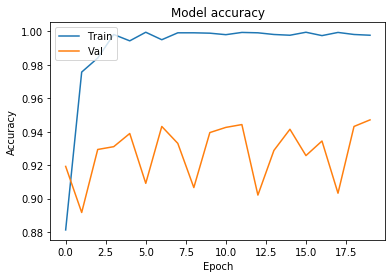

In [7]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

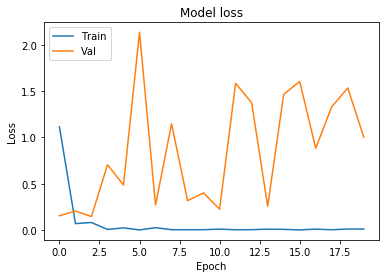

In [8]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [3]:
from keras.callbacks import ModelCheckpoint
# add a global spatial average pooling layer
x1 = base_model.output
x1=Flatten()(x1)
x1 = Dense(256, activation='relu')(x1)
predictions1 = Dense(1, activation='sigmoid')(x1)

# this is the model we will train
model1 = Model(inputs=base_model.input, outputs=predictions1)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model1.layers[:280]:
    layer.trainable = False
for layer in model1.layers[280:]:
    layer.trainable = True
# compile the model (should be done *after* setting layers to non-trainable)
model1.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', 
              metrics=['acc'])
#model.compile(loss=losses.binary_crossentropy,
            #optimizer=optimizers.RMSprop(lr=0.0001),
            #metrics=[metrics.binary_accuracy])


filepath="model8.2_{epoch:02d}-{val_loss:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_best_only=True)

# train the model on the new data for a few epochs
history1 = model1.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=20,
                    callbacks=[checkpoint]

)

Epoch 1/20
35/35 [==============================] - 1354s 39s/step - loss: 1.3834 - acc: 0.7682 - val_loss: 0.3055 - val_acc: 0.8990

Epoch 00001: val_loss improved from inf to 0.30554, saving model to model8.2_01-0.31.hdf5
Epoch 2/20
35/35 [==============================] - 1271s 36s/step - loss: 0.2595 - acc: 0.8938 - val_loss: 0.1196 - val_acc: 0.8920

Epoch 00002: val_loss improved from 0.30554 to 0.11960, saving model to model8.2_02-0.12.hdf5
Epoch 3/20
35/35 [==============================] - 1207s 34s/step - loss: 0.1369 - acc: 0.9498 - val_loss: 1.0341 - val_acc: 0.7544

Epoch 00003: val_loss did not improve from 0.11960
Epoch 4/20
35/35 [==============================] - 1206s 34s/step - loss: 0.0615 - acc: 0.9745 - val_loss: 0.9368 - val_acc: 0.8425

Epoch 00004: val_loss did not improve from 0.11960
Epoch 5/20
35/35 [==============================] - 1206s 34s/step - loss: 0.0764 - acc: 0.9824 - val_loss: 0.5924 - val_acc: 0.8667

Epoch 00005: val_loss did not improve from 0

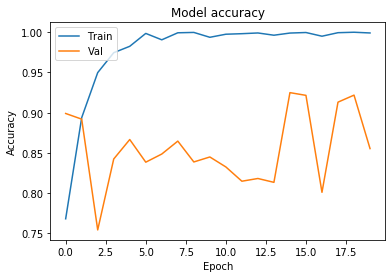

In [5]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

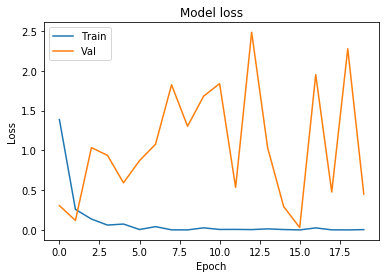

In [7]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()